<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
!pip install seaborn
!pip install scikit-learn
import sklearn
print(sklearn.__version__)


1.0.2


### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [5]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-08-13 06:21:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2022-08-13 06:21:39 (32.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [6]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [7]:
df.shape

(346, 10)

### Convert to date time object


In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


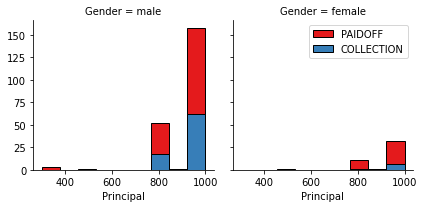

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

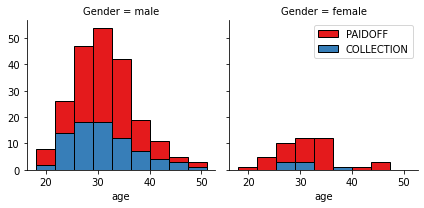

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


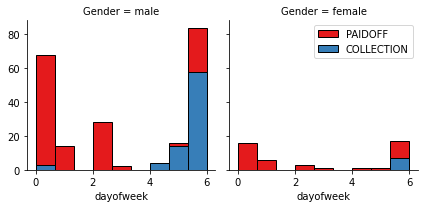

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [18]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [19]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [28]:
y = df['loan_status'].values
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [29]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [30]:
from sklearn.model_selection import train_test_split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_knn.shape,  y_train_knn.shape)
print ('Test set:', X_test_knn.shape,  y_test_knn.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [31]:
from sklearn.neighbors import KNeighborsClassifier

k = 7
##Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn,y_train_knn)
neigh

KNeighborsClassifier(n_neighbors=7)

Train set Accuracy:  0.7971014492753623
Test set Accuracy:  0.7571428571428571


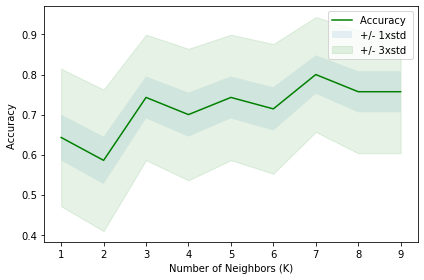

Jaccard Score for Model: 0.22727272727272727
Test Set F1 Score: 0.7468745610338531


In [34]:
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

yhat_knn = neigh.predict(X_test_knn)
yhat_knn [0:5]

print("Train set Accuracy: ", metrics.accuracy_score(y_train_knn, neigh.predict(X_train_knn)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test_knn, yhat_knn))

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_knn, y_train_knn)
    yhat_knn =neigh.predict(X_test_knn)
    mean_acc[n-1] = metrics.accuracy_score(y_test_knn, yhat_knn)

    
    std_acc[n-1]=np.std(yhat_knn==y_test_knn)/np.sqrt(yhat_knn.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

knn_model_eval_jacc = jaccard_score(y_test_knn, yhat_knn, pos_label= 0)
print("Jaccard Score for Model:", knn_model_eval_jacc)

from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test_knn, yhat_knn, average='weighted') 
print("Test Set F1 Score:", knn_f1)

# Decision Tree


In [37]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

from sklearn.model_selection import train_test_split
X_trainset_dt, X_testset_dt, y_trainset_dt, y_testset_dt = train_test_split(X, y, test_size=0.3, random_state=3)

print('Shape of X training set {}'.format(X_trainset_dt.shape),'&','Size of Y training set {}'.format(y_trainset_dt.shape))

Shape of X training set (242, 8) & Size of Y training set (242,)


In [39]:
loanstatusTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanstatusTree.fit(X_trainset_dt,y_trainset_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

DecisionTrees's Accuracy:  0.6538461538461539


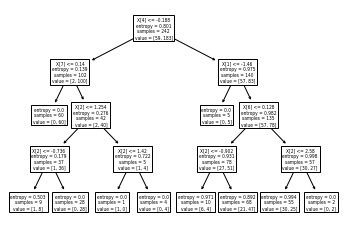

Jaccard Score for Model: 0.2653061224489796
Test Set F1 Score: 0.6666949930317142


In [41]:
predTree = loanstatusTree.predict(X_testset_dt)

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset_dt, predTree))
tree.plot_tree(loanstatusTree)
plt.show()

dt_model_jacc = jaccard_score(y_testset_dt, predTree, pos_label= 0)
print("Jaccard Score for Model:", dt_model_jacc)

from sklearn.metrics import f1_score
dt_f1 = f1_score(y_testset_dt, predTree, average='weighted') 
print("Test Set F1 Score:", dt_f1)

# Support Vector Machine


In [42]:
df_vm = df[pd.to_numeric(df['loan_status'], errors='coerce').notnull()]
df_vm['loan_status'] = df_vm['loan_status'].astype('int')


df_vm.dtypes

y = df['loan_status'].values
y[0:5]

X_train_vm, X_test_vm, y_train_vm, y_test_vm = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_vm.shape,  y_train_vm.shape)
print ('Test set:', X_test_vm.shape,  y_test_vm.shape)

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_vm, y_train_vm) 

yhat_vm = clf.predict(X_test_vm)
yhat_vm [0:5]

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


array([0, 1, 1, 1, 1])

              precision    recall  f1-score   support

           0       0.36      0.27      0.31        15
           1       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70

Confusion matrix, without normalization
[[ 4 11]
 [ 7 48]]


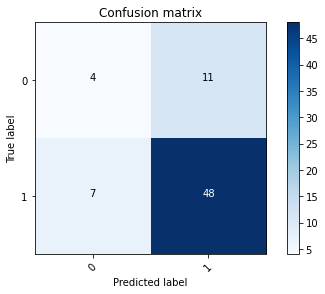

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_vm, yhat_vm, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test_vm, yhat_vm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [44]:
from sklearn.metrics import f1_score
vm_f1 = f1_score(y_test_vm, yhat_vm, average='weighted') 

print("Jaccard Score for Model:", vm_f1)

vm_f1 = f1_score(y_testset_dt, predTree, average='weighted') 
print("Test Set F1 Score:", vm_f1)

Jaccard Score for Model: 0.7275882012724117
Test Set F1 Score: 0.6666949930317142


# Logistic Regression


In [45]:
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_lr.shape,  y_train_lr.shape)
print ('Test set:', X_test_lr.shape,  y_test_lr.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_lr,y_train_lr)

yhat_lr = LR.predict(X_test_lr)
yhat_prob_lr = LR.predict_proba(X_test_lr)

In [49]:
from sklearn.metrics import jaccard_score
lr_jc = jaccard_score(y_test_lr, yhat_lr, pos_label= 0)
from sklearn.metrics import f1_score
lr_f1 = f1_score(y_test_lr, yhat_lr, average='weighted') 

print("Test Set Jaccard Score:", lr_jc)
print("Test Set F1 Score:", lr_f1)

Test Set Jaccard Score: 0.08333333333333333
Test Set F1 Score: 0.6670522459996144


# Model Evaluation using Test set


In [50]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [51]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-08-13 06:57:22--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-08-13 06:57:22 (17.8 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [52]:
test_df = pd.read_csv('loan_test.csv')
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
test_X[0:5]

test_y = test_df['loan_status'].values

### KNN Model Evaluation


In [53]:
test_yhat_knn = neigh.predict(test_X)
test_yhat_knn [0:5]
print("Train set Accuracy: ", metrics.accuracy_score(y_train_knn, neigh.predict(X_train_knn)))
print("Model Evaluation Test Set's Accuracy: ", metrics.accuracy_score(test_y, test_yhat_knn))

knn_model_jacc = jaccard_score(test_y, test_yhat_knn, pos_label= 0)
print("Jaccard Score for Model:", knn_model_jacc)

from sklearn.metrics import f1_score
knn_f1 = f1_score(test_y, test_yhat_knn, average='weighted') 
print("Test Set F1 Score:", knn_f1)

Train set Accuracy:  0.7971014492753623
Model Evaluation Test Set's Accuracy:  0.7037037037037037
Jaccard Score for Model: 0.15789473684210525
Test Set F1 Score: 0.6736355806123249


### Decision Tree Model Evaluation


DecisionTrees's Accuracy:  0.7777777777777778


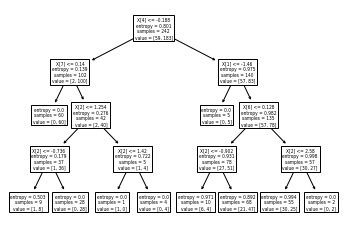

Jaccard Score for Model: 0.42857142857142855
Test Set F1 Score: 0.6666949930317142


In [54]:
test_predTree = loanstatusTree.predict(test_X)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(test_y, test_predTree))
tree.plot_tree(loanstatusTree)
plt.show()

dt_model_jacc = jaccard_score(test_y, test_predTree, pos_label= 0)
print("Jaccard Score for Model:", dt_model_jacc)
dt_model_f1 = f1_score(test_y, test_predTree, average='weighted') 
print("Test Set F1 Score:", dt_f1)

### Support Vector Model Evaluation


              precision    recall  f1-score   support

           0       0.80      0.29      0.42        14
           1       0.80      0.97      0.88        40

    accuracy                           0.80        54
   macro avg       0.80      0.63      0.65        54
weighted avg       0.80      0.80      0.76        54

Confusion matrix, without normalization
[[ 4 10]
 [ 1 39]]
Jaccard Score for Model: 0.26666666666666666
F Score for Model Evaluation: 0.7583503077293734


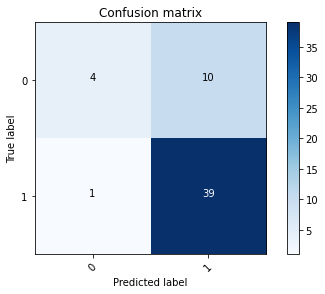

In [57]:
vm_eval_yhat = clf.predict(test_X)

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, vm_eval_yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(test_y, vm_eval_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

vm_eval_jacc = jaccard_score(test_y, vm_eval_yhat, pos_label= 0)
print("Jaccard Score for Model:", vm_eval_jacc)
vm_eval_f1 = f1_score(test_y, vm_eval_yhat, average='weighted') 
print("F Score for Model Evaluation:", vm_eval_f1)

### Linear Regression Model Evaluation


In [62]:
test_yhat_lr = LR.predict(test_X)
test_yhat_prob_lr = LR.predict_proba(test_X)
lr_eval_jacc = jaccard_score(test_y, test_yhat_lr, pos_label= 0)
print("Logistic Regression Jaccard Score:", lr_eval_jacc)
lr_eval_f1 = f1_score(test_y, test_yhat_lr, average='weighted') 
print("F Score for Model Evaluation:", lr_eval_f1)


print (classification_report(test_y, test_yhat_lr))

from sklearn.metrics import log_loss
log_loss(test_y, test_yhat_lr)

Logistic Regression Jaccard Score: 0.06666666666666667
F Score for Model Evaluation: 0.6604267310789049
              precision    recall  f1-score   support

           0       0.50      0.07      0.12        14
           1       0.75      0.97      0.85        40

    accuracy                           0.74        54
   macro avg       0.62      0.52      0.49        54
weighted avg       0.69      0.74      0.66        54



8.954690079543372

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


In [59]:
print("KNN Jaccard Score:", knn_model_jacc)
print("KNN F1 Score:",knn_f1)
print("Decision Tree's Jaccard Score:", dt_model_jacc)
print("Decision Tree's F1 Score:", dt_model_f1 )
print("Support Vector Machine Jaccard Score:",vm_eval_jacc )
print("Support Vector Machine F1 Score:", vm_eval_f1) 
print("Logistic Regression Jaccard Score:", lr_eval_jacc)
print("Logistic Regeression F1-Score:", lr_eval_f1)
print("Logistic Regression LogLoss:", log_loss(test_y, test_yhat_lr))

KNN Jaccard Score: 0.15789473684210525
KNN F1 Score: 0.6736355806123249
Decision Tree's Jaccard Score: 0.42857142857142855
Decision Tree's F1 Score: 0.7823361823361823
Support Vector Machine Jaccard Score: 0.26666666666666666
Support Vector Machine F1 Score: 0.7583503077293734
Logistic Regression Jaccard Score: 0.06666666666666667
Logistic Regeression F1-Score: 0.6604267310789049
Logistic Regression LogLoss:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.15789 | 0.67363  |    NA   |
| Decision Tree      | 0.42857 | 0.78233  |    NA   |
| SVM                | 0.26666 | 0.75835  |    NA   |
| LogisticRegression | 0.06666 | 0.66042  | 8.95469 |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
